In [1]:
install.packages(c('data.table', 'ggplot2'), repos='http://cran.us.r-project.org')

library(data.table)
library(ggplot2)

package 'data.table' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ngeorge\AppData\Local\Temp\RtmpugfXS7\downloaded_packages


In [2]:
# shows the current working directory (wd)
getwd()

[1] "C:/Users/ngeorge/Documents/GitHub/lending_club_EDA"

In [3]:
# loading takes a while...

# this should be the path to the data.  Adapt for your system
win_filepath <- 'C:/Users/ngeorge/Documents/GitHub/preprocess_lending_club_data/full_data/'
# same path from virtualbox shared folder
linux_filepath <- '/media/sf_C_DRIVE/Users/ngeorge/Documents/GitHub/preprocess_lending_club_data/full_data/'
accepted_def <- read.csv(gzfile(paste(win_filepath, 'accepted_2007_to_2016.csv.gz', sep='')), na.strings='')
acc_dt <- as.data.table(accepted_def)
rejected_def <- read.csv(gzfile(paste(win_filepath, 'rejected_2007_to_2016.csv.gz', sep='')), na.strings='')
rej_dt <- as.data.table(accepted_def)

In [4]:
# that's a lot of observations
dim(acc_dt)

[1] 1321847     111

In [5]:
names(acc_dt)

[1] "id"                             "member_id"                     
  [3] "loan_amnt"                      "funded_amnt"                   
  [5] "funded_amnt_inv"                "term"                          
  [7] "int_rate"                       "installment"                   
  [9] "grade"                          "sub_grade"                     
 [11] "emp_title"                      "emp_length"                    
 [13] "home_ownership"                 "annual_inc"                    
 [15] "verification_status"            "issue_d"                       
 [17] "loan_status"                    "pymnt_plan"                    
 [19] "url"                            "desc"                          
 [21] "purpose"                        "title"                         
 [23] "zip_code"                       "addr_state"                    
 [25] "dti"                            "delinq_2yrs"                   
 [27] "earliest_cr_line"               "inq_last_6mths"                
 [29] "mths_since_last_delinq"         "mths_since_last_record"        
 [31] "open_acc"                       "pub_rec"                       
 [33] "revol_bal"                      "revol_util"                    
 [35] "total_acc"                      "initial_list_status"           
 [37] "out_prncp"                      "out_prncp_inv"                 
 [39] "total_pymnt"                    "total_pymnt_inv"               
 [41] "total_rec_prncp"                "total_rec_int"                 
 [43] "total_rec_late_fee"             "recoveries"                    
 [45] "collection_recovery_fee"        "last_pymnt_d"                  
 [47] "last_pymnt_amnt"                "next_pymnt_d"                  
 [49] "last_credit_pull_d"             "collections_12_mths_ex_med"    
 [51] "mths_since_last_major_derog"    "policy_code"                   
 [53] "application_type"               "annual_inc_joint"              
 [55] "dti_joint"                      "verification_status_joint"     
 [57] "acc_now_delinq"                 "tot_coll_amt"                  
 [59] "tot_cur_bal"                    "open_acc_6m"                   
 [61] "open_il_6m"                     "open_il_12m"                   
 [63] "open_il_24m"                    "mths_since_rcnt_il"            
 [65] "total_bal_il"                   "il_util"                       
 [67] "open_rv_12m"                    "open_rv_24m"                   
 [69] "max_bal_bc"                     "all_util"                      
 [71] "total_rev_hi_lim"               "inq_fi"                        
 [73] "total_cu_tl"                    "inq_last_12m"                  
 [75] "acc_open_past_24mths"           "avg_cur_bal"                   
 [77] "bc_open_to_buy"                 "bc_util"                       
 [79] "chargeoff_within_12_mths"       "delinq_amnt"                   
 [81] "mo_sin_old_il_acct"             "mo_sin_old_rev_tl_op"          
 [83] "mo_sin_rcnt_rev_tl_op"          "mo_sin_rcnt_tl"                
 [85] "mort_acc"                       "mths_since_recent_bc"          
 [87] "mths_since_recent_bc_dlq"       "mths_since_recent_inq"         
 [89] "mths_since_recent_revol_delinq" "num_accts_ever_120_pd"         
 [91] "num_actv_bc_tl"                 "num_actv_rev_tl"               
 [93] "num_bc_sats"                    "num_bc_tl"                     
 [95] "num_il_tl"                      "num_op_rev_tl"                 
 [97] "num_rev_accts"                  "num_rev_tl_bal_gt_0"           
 [99] "num_sats"                       "num_tl_120dpd_2m"              
[101] "num_tl_30dpd"                   "num_tl_90g_dpd_24m"            
[103] "num_tl_op_past_12m"             "pct_tl_nvr_dlq"                
[105] "percent_bc_gt_75"               "pub_rec_bankruptcies"          
[107] "tax_liens"                      "tot_hi_cred_lim"               
[109] "total_bal_ex_mort"              "total_bc_limit"                
[111] "total_il_high_credit_limit"

In [6]:
str(acc_dt)

Classes 'data.table' and 'data.frame':	1321847 obs. of  111 variables:
 $ id                            : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ member_id                     : num  1296599 1314167 1313524 1277178 1311748 ...
 $ loan_amnt                     : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt                   : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt_inv               : num  4975 2500 2400 10000 3000 ...
 $ term                          : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 1 2 1 2 1 2 2 ...
 $ int_rate                      : Factor w/ 593 levels "  5.32%","  5.42%",..: 110 290 315 211 177 43 315 409 480 177 ...
 $ installment                   : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 3 2 1 3 5 6 2 ...
 $ sub_grade                     : Factor w/ 35 levels "A1","A2","A3",..: 7 14 15 11 10 4 15 21 27 10 ...
 $ emp_t

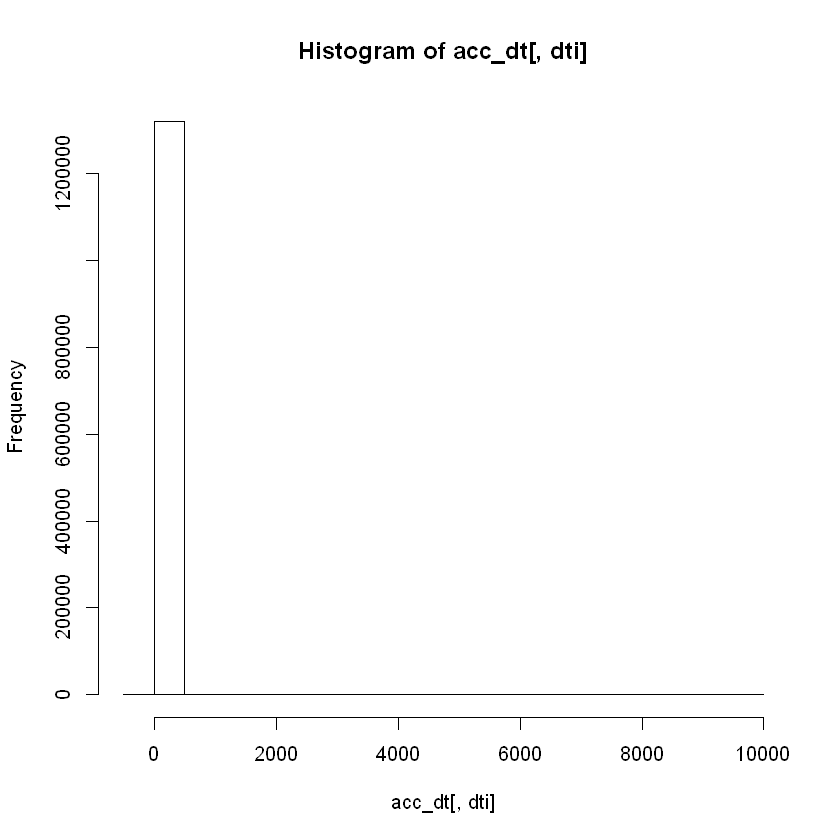

In [7]:
# outliers are screwing it up!
hist(acc_dt[, dti])

In [8]:
# from here: http://stackoverflow.com/questions/4787332/how-to-remove-outliers-from-a-dataset
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

In [9]:
dti_no_outliers <- remove_outliers(acc_dt[, dti])

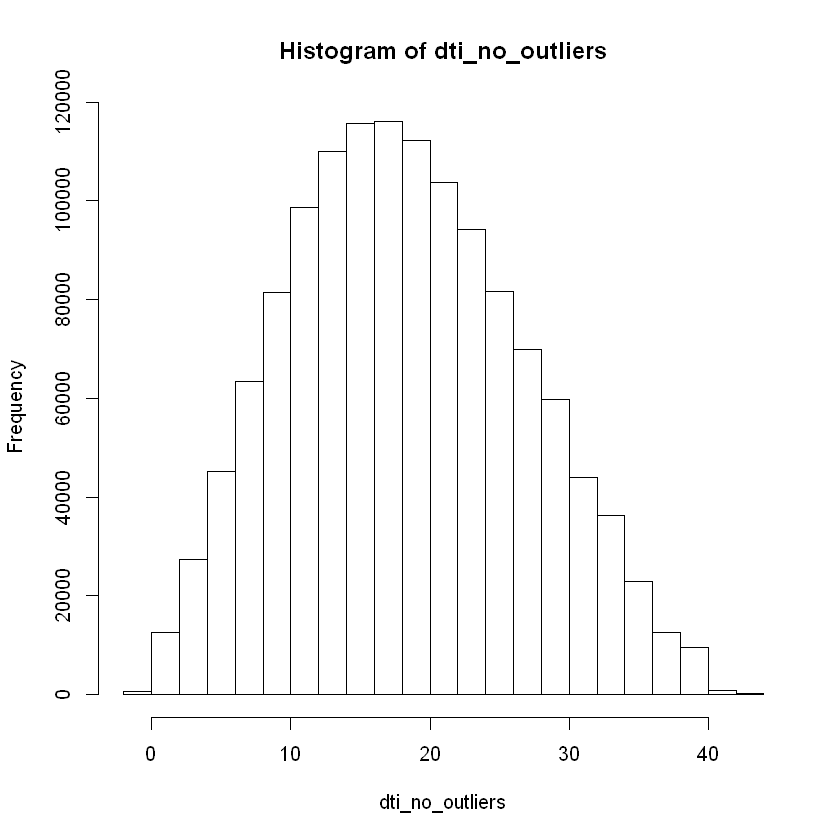

In [10]:
hist(dti_no_outliers)